In [29]:
import pandas as pd

In [30]:
df_initial = pd.read_csv('../Dataset/dubai.csv')  # Change to your filename
df = pd.read_csv('../Dataset/dubai.csv')  # Change to your filename
df_weather=pd.read_csv('../Dataset/weather_dubai.csv')

In [31]:
df_initial

,lat,lng,pop,cluster
0,25.345000,55.365833,99.5440,5
1,25.345000,55.366666,105.8060,5
2,25.345000,55.367500,105.3430,5
3,25.345000,55.368333,97.3517,5
4,25.345000,55.369166,106.7300,5
...,...,...,...,...
65913,24.916667,55.434166,19.9987,6
65914,24.916667,55.435000,19.9321,6
65915,24.916667,55.435833,19.3356,6
65916,24.916667,55.436666,19.3038,6


In [32]:
colors = [
    'red', 'blue', 'green', 'purple', 'orange',
    'darkred', 'lightred', 'beige', 'darkblue', 'darkgreen',
    'cadetblue', 'darkpurple', 'pink', 'gray', 'black'
]

In [33]:
# Define a function to truncate (cut) after 2 decimal places
def truncate(x):
    return int(x * 100) / 100

# Apply truncation
df['lat'] = df['lat'].apply(truncate)
df['lng'] = df['lng'].apply(truncate)

In [34]:
df

,lat,lng,pop,cluster
0,25.34,55.36,99.5440,5
1,25.34,55.36,105.8060,5
2,25.34,55.36,105.3430,5
3,25.34,55.36,97.3517,5
4,25.34,55.36,106.7300,5
...,...,...,...,...
65913,24.91,55.43,19.9987,6
65914,24.91,55.43,19.9321,6
65915,24.91,55.43,19.3356,6
65916,24.91,55.43,19.3038,6


In [35]:
df_weather = df_weather.drop(columns=["Unnamed: 0"])

In [36]:
df_weather

,lat,lng,avg_temp_18
0,25.34,55.37,27.063665
1,25.34,55.38,27.070166
2,25.34,55.39,27.083164
3,25.34,55.40,27.024664
4,25.34,55.41,27.057165
...,...,...,...
1798,24.91,55.09,25.517334
1799,24.91,55.08,25.504333
1800,24.91,55.07,25.510834
1801,24.91,55.05,25.523832


In [37]:
merged_df = df.merge(
    df_weather,
    on=['lat', 'lng'],
    how='left'
)


In [38]:
merged_df

,lat,lng,pop,cluster,avg_temp_18
0,25.34,55.36,99.5440,5,NaN
1,25.34,55.36,105.8060,5,NaN
2,25.34,55.36,105.3430,5,NaN
3,25.34,55.36,97.3517,5,NaN
4,25.34,55.36,106.7300,5,NaN
...,...,...,...,...,...
65913,24.91,55.43,19.9987,6,26.857166
65914,24.91,55.43,19.9321,6,26.857166
65915,24.91,55.43,19.3356,6,26.857166
65916,24.91,55.43,19.3038,6,26.857166


In [39]:
merged_df = merged_df.dropna(subset=['avg_temp_18'])

In [40]:
merged_df

,lat,lng,pop,cluster,avg_temp_18
6,25.34,55.37,102.6270,5,27.063665
7,25.34,55.37,103.2460,5,27.063665
8,25.34,55.37,104.5790,5,27.063665
9,25.34,55.37,116.7020,5,27.063665
10,25.34,55.37,121.5050,5,27.063665
...,...,...,...,...,...
65913,24.91,55.43,19.9987,6,26.857166
65914,24.91,55.43,19.9321,6,26.857166
65915,24.91,55.43,19.3356,6,26.857166
65916,24.91,55.43,19.3038,6,26.857166


# Metric

In [44]:
# Define your constants
a = 0.9  # replace with your value
b = 0.4  # replace with your value

# Create the new column
merged_df.loc[:, 'efficiency'] = merged_df['pop'] * a - merged_df['avg_temp_18'] * b

In [ ]:
# Find common indexes
common_idx = merged_df.index

# Drop rows from df_initial that are not in merged_df
df_initial_filtered = df_initial.loc[common_idx]

In [ ]:
df_initial_filtered

In [58]:
# Select only lat and lng from df_initial
# Step 1: Copy only lat and lng
final_df = df_initial_filtered[['lat', 'lng']].copy()

# this will remove all rows with NaNs in any column:
final_df = final_df.dropna().reset_index(drop=True)

# Add the efficiency column from merged_df
final_df['efficiency'] = merged_df['efficiency'].values

In [59]:
final_df

,lat,lng,efficiency
0,25.345000,55.370833,81.538834
1,25.345000,55.371666,82.095934
2,25.345000,55.372500,83.295634
3,25.345000,55.373333,94.206334
4,25.345000,55.374166,98.529034
...,...,...,...
65861,24.916667,55.434166,7.255964
65862,24.916667,55.435000,7.196024
65863,24.916667,55.435833,6.659174
65864,24.916667,55.436666,6.630554


In [60]:
# Check if any efficiency score is negative
has_negative_efficiency = (final_df['efficiency'] < 0).any()

print("Any negative efficiency values?:", has_negative_efficiency)

Any negative efficiency values?: False


# Weighted K-Means

In [61]:
import os
from pathlib import Path
from sklearn.preprocessing import StandardScaler

In [62]:
df=final_df

In [63]:
final_df

,lat,lng,efficiency
0,25.345000,55.370833,81.538834
1,25.345000,55.371666,82.095934
2,25.345000,55.372500,83.295634
3,25.345000,55.373333,94.206334
4,25.345000,55.374166,98.529034
...,...,...,...
65861,24.916667,55.434166,7.255964
65862,24.916667,55.435000,7.196024
65863,24.916667,55.435833,6.659174
65864,24.916667,55.436666,6.630554


In [64]:
X = df[['lat','lng']].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

      lat        lng  cluster
0  25.345  55.370833        6
1  25.345  55.371666        6
2  25.345  55.372500        6
3  25.345  55.373333        6
4  25.345  55.374166        6
Files written to: /Users/epameinondasdouros/Personal/Quantum/Quantum_NYUAD_Hackathon/On_Site_Code/AI/Abu_Dhabi/abu_dhabi_10


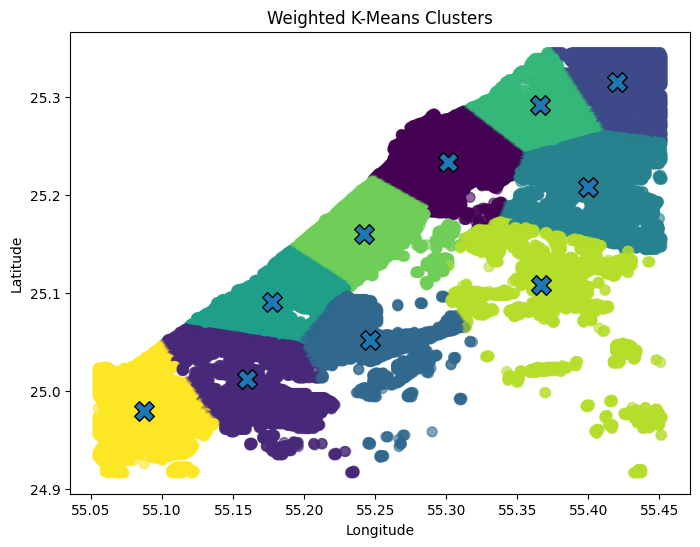

Interactive map written to point_cluster_map.html
      lat        lng  cluster
0  25.345  55.370833        6
1  25.345  55.371666        6
2  25.345  55.372500        6
3  25.345  55.373333        6
4  25.345  55.374166        6
Files written to: /Users/epameinondasdouros/Personal/Quantum/Quantum_NYUAD_Hackathon/On_Site_Code/AI/Abu_Dhabi/abu_dhabi_15


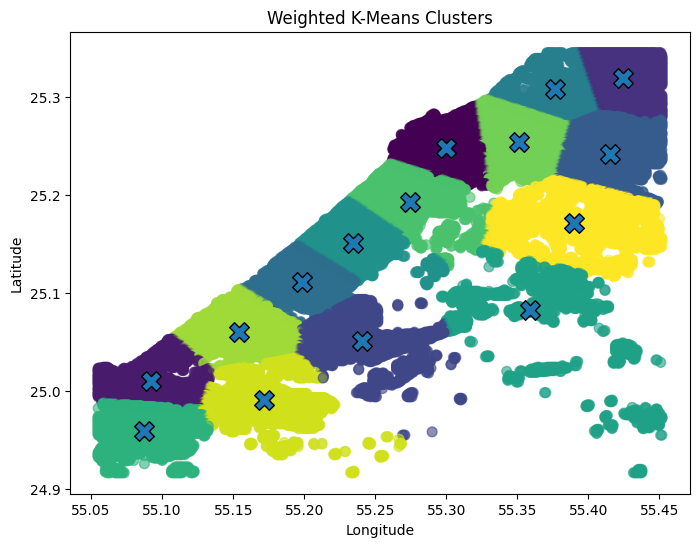

Interactive map written to point_cluster_map.html
      lat        lng  cluster
0  25.345  55.370833       17
1  25.345  55.371666       17
2  25.345  55.372500       17
3  25.345  55.373333       17
4  25.345  55.374166       17
Files written to: /Users/epameinondasdouros/Personal/Quantum/Quantum_NYUAD_Hackathon/On_Site_Code/AI/Abu_Dhabi/abu_dhabi_20


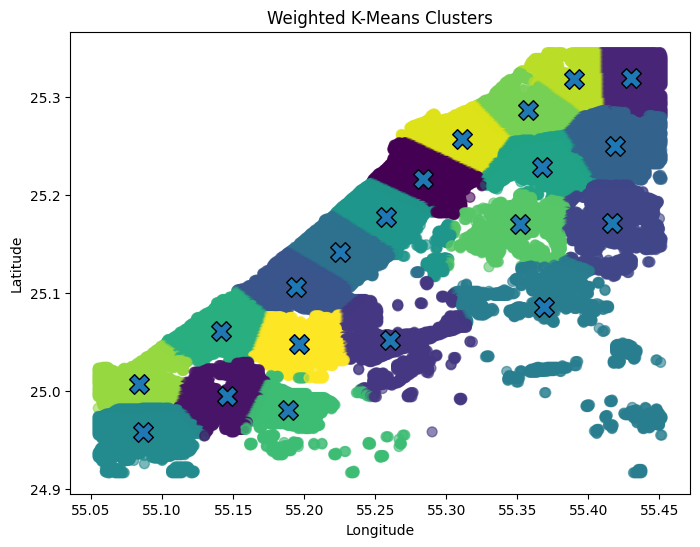

Interactive map written to point_cluster_map.html
      lat        lng  cluster
0  25.345  55.370833       20
1  25.345  55.371666       20
2  25.345  55.372500       20
3  25.345  55.373333       20
4  25.345  55.374166       20
Files written to: /Users/epameinondasdouros/Personal/Quantum/Quantum_NYUAD_Hackathon/On_Site_Code/AI/Abu_Dhabi/abu_dhabi_25


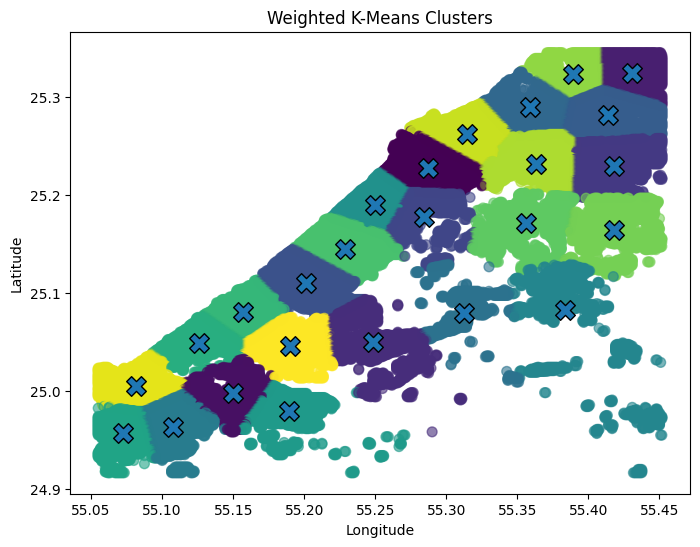

Interactive map written to point_cluster_map.html
      lat        lng  cluster
0  25.345  55.370833       20
1  25.345  55.371666       20
2  25.345  55.372500       20
3  25.345  55.373333       20
4  25.345  55.374166       20
Files written to: /Users/epameinondasdouros/Personal/Quantum/Quantum_NYUAD_Hackathon/On_Site_Code/AI/Abu_Dhabi/abu_dhabi_40


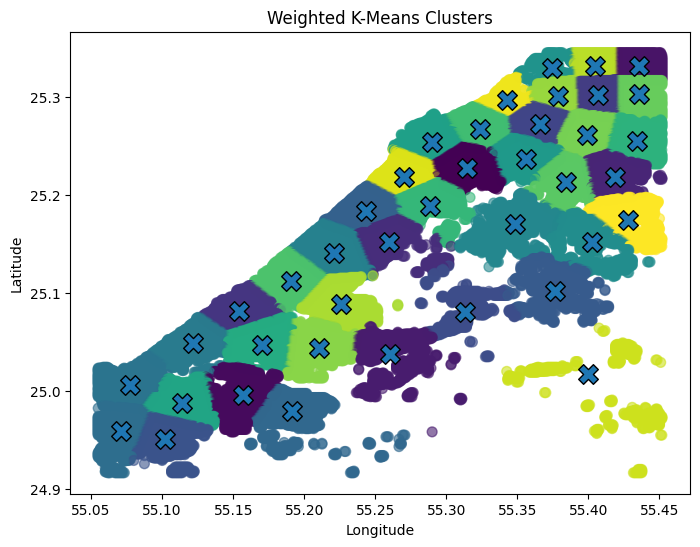

Interactive map written to point_cluster_map.html
      lat        lng  cluster
0  25.345  55.370833       20
1  25.345  55.371666       20
2  25.345  55.372500       20
3  25.345  55.373333       20
4  25.345  55.374166       20
Files written to: /Users/epameinondasdouros/Personal/Quantum/Quantum_NYUAD_Hackathon/On_Site_Code/AI/Abu_Dhabi/abu_dhabi_50


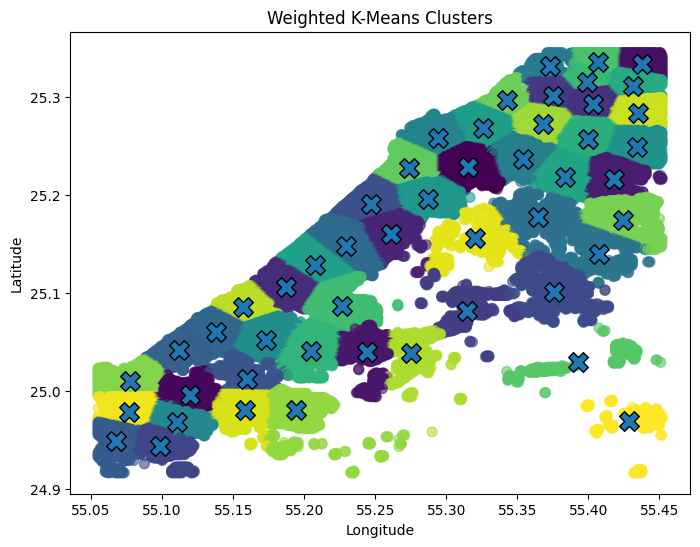

Interactive map written to point_cluster_map.html


In [65]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster

k_values=[10,15,20,25,40,50]

for k in k_values:
    X = df[['lat','lng']].values
    w=df['efficiency'].values

    kmeans_w = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans_w.fit(X, sample_weight=w)         # pass your pop column here
    labels = kmeans_w.predict(X)             # or just use kmeans.labels_
    centers = kmeans_w.cluster_centers_

    # X[:,0]=lat, X[:,1]=lng
    labels = kmeans_w.labels_
    centers = kmeans_w.cluster_centers_

    df_final = pd.DataFrame(
        X,
        columns=['lat','lng']
    )
    df_final['cluster'] = labels

    print(df_final.head())

    folder = Path(f"Abu_Dhabi/abu_dhabi_{k}")   # e.g. dubai_50
    folder.mkdir(parents=True, exist_ok=True)

    df_final.to_csv(folder / "clusters.csv", index=False)

    centers_df = pd.DataFrame(centers, columns=["lat_center", "lng_center"])
    centers_df.to_csv(folder / "centers.csv", index=False)

    print(f"Files written to: {folder.resolve()}")

    import matplotlib.pyplot as plt

    # X[:,0]=lat, X[:,1]=lng
    labels = kmeans_w.labels_
    centers = kmeans_w.cluster_centers_

    plt.figure(figsize=(8,6))
    # plot each point colored by its cluster
    plt.scatter(
        X[:,1], X[:,0],
        c=labels,
        s=50,
        alpha=0.6
    )
    # mark cluster centers
    plt.scatter(
        centers[:,1], centers[:,0],
        marker='X',
        s=200,
        edgecolor='black'
    )

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Weighted K-Means Clusters')
    plt.show()

    m = folium.Map(
        location=[df['lat'].mean(), df['lng'].mean()],
        zoom_start=10
    )

    marker_cluster = MarkerCluster().add_to(m)

    for idx, point in df_final.iterrows():
        c = int(point['cluster'])
        folium.Circle(
            location=(point['lat'], point['lng']),
            radius=1,
            color=colors[c % len(colors)],
            fill=True
        ).add_to(m)

    for i in range(centers.shape[0]):
        # try both possible column names
        lat = centers[i][0]
        lng = centers[i][1]
        # build popup text
        popup = f"Center {idx}"
        folium.Marker(
            location=(lat, lng),
            icon=folium.Icon(color='black', icon='info-sign'),
            popup=popup
        ).add_to(m)

    # 6️⃣ Save to HTML
    m.save(f'weather_abu_dhabi_{k}.html')
    print("Interactive map written to point_cluster_map.html")


In [66]:
df_final = pd.DataFrame(
    X,
    columns=['lat','lng']
)
df_final['cluster'] = labels

print(df_final.head())

      lat        lng  cluster
0  25.345  55.370833       20
1  25.345  55.371666       20
2  25.345  55.372500       20
3  25.345  55.373333       20
4  25.345  55.374166       20
